<a href="https://colab.research.google.com/github/vieraschiavi/VieraMartin/blob/main/Prediccion_ventas_MV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [4]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")
print(data.head())
print(data.info())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [5]:
# Convertir la columna "Date" a tipo de datos de fecha
data["Date"] = pd.to_datetime(data["Date"])

# Ordenar los datos por fecha
data = data.sort_values(by="Date")

# Comprobar si hay valores nulos o faltantes
print(data.isnull().sum())

# Eliminar columnas innecesarias para el modelo de proyección
data = data[["Date", "Product line", "Total"]]

# Verificar los tipos de datos y la estructura de los datos preprocesados
print(data.dtypes)
print(data.head())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
Date            datetime64[ns]
Product line            object
Total                  float64
dtype: object
          Date         Product line    Total
856 2019-01-01   Food and beverages  177.408
567 2019-01-01  Fashion accessories  621.243
245 2019-01-01   Home and lifestyle  399.756
696 2019-01-01    Sports and travel  113.568
523 2019-01-01    Health and beauty  132.027


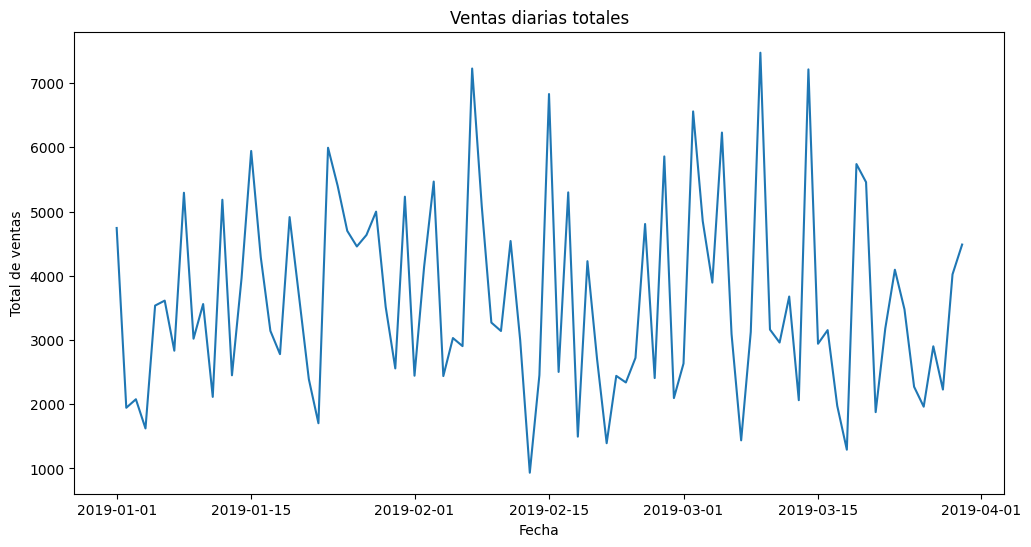

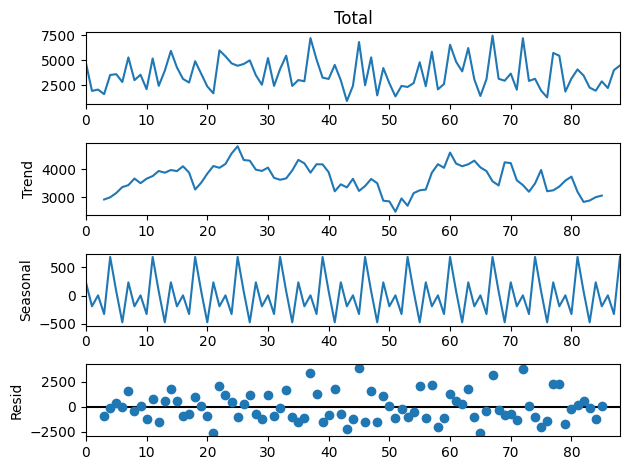

In [6]:
# Agregar la columna "Total" por fecha para obtener las ventas diarias totales
daily_sales = data.groupby("Date")["Total"].sum().reset_index()

# Visualizar las ventas diarias totales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales["Date"], daily_sales["Total"])
plt.title("Ventas diarias totales")
plt.xlabel("Fecha")
plt.ylabel("Total de ventas")
plt.show()

# Descomponer las ventas diarias totales en componentes de tendencia, estacionalidad y residuo
result = seasonal_decompose(daily_sales["Total"], model="additive", period=7)
result.plot()
plt.show()


In [7]:
# Establecer la columna "Date" como índice
data.set_index("Date", inplace=True)

# Agrupar los datos por mes y calcular las ventas mensuales totales
monthly_sales = data.groupby(pd.Grouper(freq="M"))["Total"].sum().reset_index()

# Establecer la columna "Date" como índice
monthly_sales.set_index("Date", inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(monthly_sales) * 0.8)
train_data, test_data = monthly_sales[:train_size], monthly_sales[train_size:]


In [16]:
# Extraer la columna de interés del DataFrame monthly_sales_filled
sales_column = monthly_sales_filled['Total']

# Crear una serie temporal con los datos y el índice adecuado
ts = pd.Series(sales_column, index=date_range)

# Dividir los datos en entrenamiento y prueba
train_data = ts[:train_size]
test_data = ts[train_size:]

In [18]:
# Verificar las longitudes de los datos y el índice
print(len(monthly_sales_numeric))
print(len(date_range))

3
3


In [21]:
import numpy as np

# Convertir los datos a un array unidimensional
monthly_sales_flat = np.array(monthly_sales_numeric).flatten()

# Crear una serie temporal con los datos y el índice adecuado
ts = pd.Series(monthly_sales_flat, index=date_range)

In [23]:
# Convertir los datos a un tipo de datos numérico
monthly_sales_numeric = monthly_sales_filled.astype(float)

# Crear un rango de fechas para el índice
date_range = pd.date_range(start='2019-01-01', periods=len(monthly_sales_numeric), freq='M')



# Dividir los datos en entrenamiento y prueba
train_data = ts[:train_size]
test_data = ts[train_size:]

In [29]:
# Crear una serie temporal con los datos y el índice adecuado
ts = pd.Series(monthly_sales_filled.values.flatten(), index=date_range)

In [32]:
# Importar la biblioteca Pandas
import pandas as pd

# Definir la fecha de inicio y el número de períodos
start_date = '2019-01-01'
num_periods = len(monthly_sales_numeric)

# Crear el rango de fechas
date_range = pd.date_range(start=start_date, periods=num_periods, freq='M')

In [43]:
from pmdarima.arima import auto_arima

# Ajustar el modelo ARIMA automáticamente
model = auto_arima(train_data, seasonal=True, m=12, suppress_warnings=True)
print(model.summary())

ModuleNotFoundError: ignored

In [48]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00


In [49]:
from pmdarima.arima import auto_arima

In [51]:
# Ajustar el modelo ARIMA automáticamente
model = auto_arima(train_data, seasonal=True, m=12, suppress_warnings=True)
print(model.summary())

ValueError: ignored

In [ ]:
# Entrenar el modelo ARIMA con los datos de entrenamiento
model.fit(train_data)

# Realizar predicciones en el conjunto de datos de prueba
predictions = model.predict(n_periods=len(test_data))

In [ ]:
# Evaluar modelo ARIMA
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_data, predictions)
r2 = r2_score(test_data, predictions)

print("MSE:", mse)
print("R^2:", r2)

In [ ]:
#calcular el error porcentual absoluto medio (MAPE) para medir la precisión de la predicción en términos porcentuales
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data, predictions)
print("MAPE:", mape)

In [ ]:
# Visualizacion de predicciones
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label="Datos reales")
plt.plot(test_data.index, predictions, label="Predicciones ARIMA", color="red")
plt.title("Predicciones de ventas mensuales")
plt.xlabel("Fecha")
plt.ylabel("Total de ventas")
plt.legend()
plt.show()